# NY Rodent Inspection

## Introducción

Conjunto de datos contiene información sobre inspecciones de ratas.El Portal de información de ratas (RIP, por sus siglas en inglés) es una aplicación de mapeo basada en la web donde los usuarios pueden ver los datos de inspección de ratas. 

Los datos son emitidos por el Departamento de Salud e Higiene Mental de la Ciudad de Nueva York (DOHMH), División de Base de Datos de Control de Plagas de Salud Ambiental, los cuales tomamos de la pagina [Open Data for All New Yorkers](https://data.cityofnewyork.us/Health/Rodent-Inspection/p937-wjvj) y su actualización es **diaria**.

Sobre de los datos: tenga en cuenta que si una propiedad no aparece en el archivo, eso no indica la ausencia de ratas, sino que simplemente no se ha inspeccionado. Es posible también que los vecindarios con un mayor número de propiedades con signos activos de ratas no tengan una mayor población de ratas, sino que simplemente tengan más inspecciones.

## Análisis exploratorio inicial

In [1]:
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

os.chdir("../..")
os.chdir("src/utils")

from matplotlib.ticker import FuncFormatter
import eda_prepare

In [2]:
data = pd.read_csv('../../data/Rodent_Inspection.csv')

In [3]:
data.dataframeName = 'Rodent_Inspection.csv'
nRow, nCol = data.shape
print(f'Tenemos {nRow} renglones y {nCol} columnas')

Tenemos 2007833 renglones y 20 columnas


In [4]:
data.head()

,INSPECTION_TYPE,JOB_TICKET_OR_WORK_ORDER_ID,JOB_ID,JOB_PROGRESS,BBL,BORO_CODE,BLOCK,LOT,HOUSE_NUMBER,STREET_NAME,ZIP_CODE,X_COORD,Y_COORD,LATITUDE,LONGITUDE,BOROUGH,INSPECTION_DATE,RESULT,APPROVED_DATE,LOCATION
0,Initial,13252142,PC7732347,1,2024090050,2,2409,50,0000,MELROSE AVENUE,NaN,NaN,NaN,0.0,0.0,Bronx,07/07/2021 10:05:45 AM,Failed for Other R,07/09/2021 11:33:07 AM,"(0.0, 0.0)"
1,Compliance,12802045,PC7500960,2,5011840160,5,1184,160,000,WENLOCK STREET,NaN,NaN,NaN,0.0,0.0,Staten Island,11/10/2011 02:50:52 PM,Failed for Other R,11/14/2011 03:28:40 PM,"(0.0, 0.0)"
2,Compliance,12990129,PC7054124,2,3089140016,3,8914,16,000,Abbey Court,NaN,0.0,0.0,0.0,0.0,Brooklyn,09/26/2017 02:00:25 PM,Passed,09/27/2017 12:58:55 PM,NaN
3,Initial,12328443,PC6737067,1,2025390132,2,2539,132,10,MAJ WM DEEGAN BLVD,NaN,1003704.0,240136.0,0.0,0.0,Bronx,09/12/2017 02:45:42 PM,Passed,09/14/2017 02:41:03 PM,"(0.0, 0.0)"
4,Initial,11362643,PC7466087,1,5002210035,5,221,35,000,Roe Street,NaN,950510.0,169320.0,0.0,0.0,Staten Island,06/02/2016 03:08:18 PM,Passed,06/07/2016 02:35:38 PM,"(0.0, 0.0)"


Veamos los valores `NA's`

In [5]:
data.isnull().sum()

INSPECTION_TYPE                     0
JOB_TICKET_OR_WORK_ORDER_ID         0
JOB_ID                              0
JOB_PROGRESS                        0
BBL                                 0
BORO_CODE                           0
BLOCK                               0
LOT                                 0
HOUSE_NUMBER                    48758
STREET_NAME                      5483
ZIP_CODE                        11154
X_COORD                        123209
Y_COORD                        123209
LATITUDE                         6754
LONGITUDE                        6754
BOROUGH                           103
INSPECTION_DATE                    17
RESULT                             13
APPROVED_DATE                    1633
LOCATION                         7397
dtype: int64

In [7]:
data = cleanning(data)

In [8]:
data.head()

,inspection_type,job_ticket_or_work_order_id,job_id,job_progress,bbl,boro_code,block,lot,house_number,street_name,zip_code,x_coord,y_coord,latitude,longitude,borough,inspection_date,result,approved_date,location
0,initial,13252142,PC7732347,1,2024090050,2,2409,50,0000,melrose avenue,0,0,0,0.0,0.0,Bronx,2021-07-07 10:05:45,Failed for Other R,07/09/2021 11:33:07 AM,"(0.0, 0.0)"
1,compliance,12802045,PC7500960,2,5011840160,5,1184,160,000,wenlock street,0,0,0,0.0,0.0,Staten Island,2011-11-10 14:50:52,Failed for Other R,11/14/2011 03:28:40 PM,"(0.0, 0.0)"
2,compliance,12990129,PC7054124,2,3089140016,3,8914,16,000,abbey court,0,0.0,0.0,0.0,0.0,Brooklyn,2017-09-26 14:00:25,Passed,09/27/2017 12:58:55 PM,"(0.0, 0.0)"
3,initial,12328443,PC6737067,1,2025390132,2,2539,132,10,maj wm deegan blvd,0,1003704.0,240136.0,0.0,0.0,Bronx,2017-09-12 14:45:42,Passed,09/14/2017 02:41:03 PM,"(0.0, 0.0)"
4,initial,11362643,PC7466087,1,5002210035,5,221,35,000,roe street,0,950510.0,169320.0,0.0,0.0,Staten Island,2016-06-02 15:08:18,Passed,06/07/2016 02:35:38 PM,"(0.0, 0.0)"


In [9]:
data['inspection_date'] = pd.to_datetime(data['inspection_date'], dayfirst=True)
data['approved_date'] = pd.to_datetime(data['approved_date'], dayfirst=True)

In [ ]:
data.columns

In [ ]:
data.dtypes

### Tipo de inspeccion

In [29]:
data['inspection_type'].value_counts() 

initial       1416858
bait           307794
compliance     280931
clean_ups        1585
stoppage          665
Name: inspection_type, dtype: int64

aqui podemos ver que la mayoria de las inspecciones estan en un tipo inicial.

### Distritos

In [32]:
data.iloc[:,[5,15]].drop_duplicates(subset = 'borough')

,boro_code,borough
0,2,Bronx
1,5,Staten Island
2,3,Brooklyn
5,1,Manhattan
7,4,Queens
124,9,No especificado


In [12]:
data['year_inspection']= data['inspection_date'].dt.year
data['month_inspection']= data['inspection_date'].dt.month
data['day_inspection']= data['inspection_date'].dt.day

In [27]:
data_year = data.groupby(['year_inspection']).size() 
data_year

year_inspection
1918.0         1
1930.0         2
1935.0         2
1945.0         1
1950.0         2
1956.0         1
1958.0         1
1971.0         1
2000.0         2
2001.0        15
2002.0         5
2003.0         5
2007.0         1
2008.0         5
2009.0     19771
2010.0    152740
2011.0    157475
2012.0    172971
2013.0    132452
2014.0    134805
2015.0    135858
2016.0    181316
2017.0    249059
2018.0    254841
2019.0    248357
2020.0     74793
2021.0     93331
2024.0         1
2025.0         1
2029.0         1
dtype: int64

Las inspecciones antes de 2009 parecen ser errores de captura, al igual que las que estan despues de 2021.

## Análisis grafico exploratorio inicial

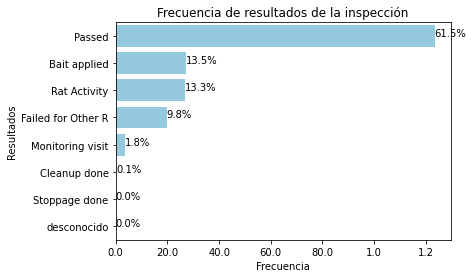

In [15]:
a = sns.countplot(y="result", data=data,
                  order = data['result'].value_counts().index, color="skyblue")
a.set_title("Frecuencia de resultados de la inspección")
a.set_ylabel("Resultados")
a.set_xlabel("Frecuencia")

total = len(data['result'])
for p in a.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        a.annotate(percentage, (x, y))
        
a.xaxis.set_major_formatter(FuncFormatter(number_formatter))
plt.show()

In [16]:
data.head()

,inspection_type,job_ticket_or_work_order_id,job_id,job_progress,bbl,boro_code,block,lot,house_number,street_name,...,latitude,longitude,borough,inspection_date,result,approved_date,location,year_inspection,month_inspection,day_inspection
0,initial,13252142,PC7732347,1,2024090050,2,2409,50,0000,melrose avenue,...,0.0,0.0,Bronx,2021-07-07 10:05:45,Failed for Other R,2021-09-07 11:33:07,"(0.0, 0.0)",2021.0,7.0,7.0
1,compliance,12802045,PC7500960,2,5011840160,5,1184,160,000,wenlock street,...,0.0,0.0,Staten Island,2011-11-10 14:50:52,Failed for Other R,2011-11-14 15:28:40,"(0.0, 0.0)",2011.0,11.0,10.0
2,compliance,12990129,PC7054124,2,3089140016,3,8914,16,000,abbey court,...,0.0,0.0,Brooklyn,2017-09-26 14:00:25,Passed,2017-09-27 12:58:55,"(0.0, 0.0)",2017.0,9.0,26.0
3,initial,12328443,PC6737067,1,2025390132,2,2539,132,10,maj wm deegan blvd,...,0.0,0.0,Bronx,2017-09-12 14:45:42,Passed,2017-09-14 14:41:03,"(0.0, 0.0)",2017.0,9.0,12.0
4,initial,11362643,PC7466087,1,5002210035,5,221,35,000,roe street,...,0.0,0.0,Staten Island,2016-06-02 15:08:18,Passed,2016-07-06 14:35:38,"(0.0, 0.0)",2016.0,6.0,2.0


Text(0.5, 0, 'mes')

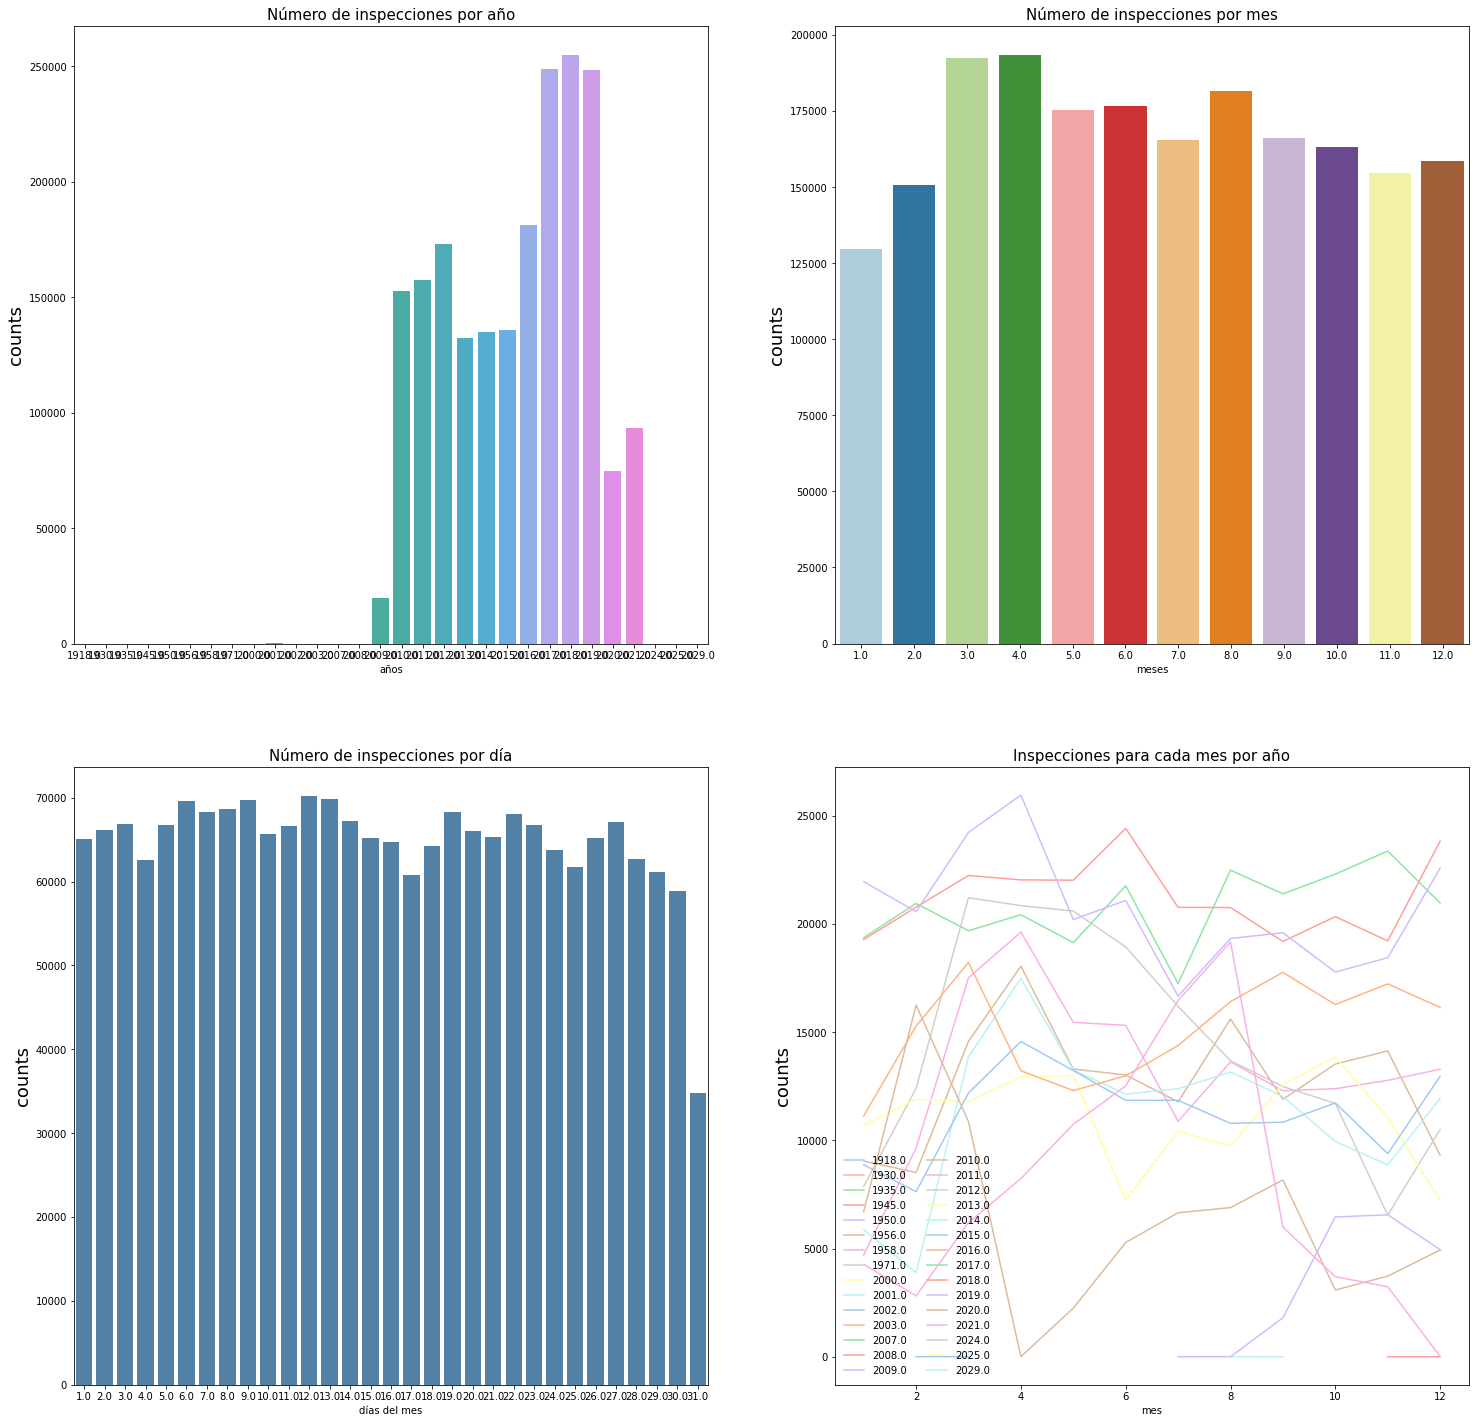

In [23]:
fig,ax=plt.subplots(2,2,figsize=(25,25))
label_colors = ["steelblue","steelblue","steelblue","steelblue",
                "steelblue","steelblue","steelblue","steelblue",
                "steelblue","steelblue","steelblue","steelblue"]
label_Palette = sns.set_palette(sns.color_palette(label_colors))
sns.color_palette()
sns.set_palette(sns.color_palette("Paired"))
x=data.year_inspection.value_counts().index
y=data.year_inspection.value_counts()

sns.barplot(x=x,y=y,ax=ax[0,0],order=x.sort_values())
ax[0,0].set_title("Número de inspecciones por año",size=15)
ax[0,0].set_ylabel('counts',size=18)
ax[0,0].set_xlabel('años')

x=data.month_inspection.value_counts().index
y=data.month_inspection.value_counts()
sns.barplot(x=x,y=y,ax=ax[0,1],order=x.sort_values())
ax[0,1].set_title("Número de inspecciones por mes",size=15)
ax[0,1].set_ylabel('counts',size=18)
ax[0,1].set_xlabel('meses')

label_colors = ["steelblue","steelblue","steelblue","steelblue",
                "steelblue","steelblue","steelblue","steelblue",
                "steelblue","steelblue","steelblue","steelblue",
                "steelblue","steelblue","steelblue","steelblue",
                "steelblue","steelblue","steelblue","steelblue",
                "steelblue","steelblue","steelblue","steelblue",
                "steelblue","steelblue","steelblue","steelblue",
                "steelblue","steelblue","steelblue"]
label_Palette = sns.set_palette(sns.color_palette(label_colors))
x=data.day_inspection.value_counts().index
y=data.day_inspection.value_counts()
sns.barplot(x=x,y=y,ax=ax[1,0],order=x.sort_values())
ax[1,0].set_title("Número de inspecciones por día",size=15)
ax[1,0].set_ylabel('counts',size=18)
ax[1,0].set_xlabel('días del mes')

sns.set_palette(sns.set_palette("pastel"))
data.groupby(['year_inspection','month_inspection'])['job_id'].agg('count').unstack('year_inspection').plot(ax=ax[1,1])
ax[1,1].set_title("Inspecciones para cada mes por año",size=15)
ax[1,1].legend(loc='lower left', frameon=False, ncol=2)
ax[1,1].set_ylabel('counts',size=18)
ax[1,1].set_xlabel('mes')